In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:

data = pd.read_excel("C:\\Users\\Gözde\\Desktop\\data\\mlproje.xlsx")


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Arttrlabilir Azami Bellek  271 non-null    object 
 1   Balantlar                  766 non-null    object 
 2   Balantlar (kincil)         10 non-null     object 
 3   Beden                      46 non-null     object 
 4   Cihaz Arl                  822 non-null    object 
 5   Dokunmatik Ekran           697 non-null    object 
 6   Ekran Boyutu               851 non-null    object 
 7   Ekran Kart                 987 non-null    object 
 8   Ekran Kart Bellek Tipi     986 non-null    object 
 9   Ekran Kart Hafzas          926 non-null    object 
 10  Ekran Kart Tipi            979 non-null    object 
 11  Ekran Yenileme Hz          791 non-null    object 
 12  Ekran zellii               8 non-null      object 
 13  Garanti Sresi              952 non-null    objec

In [44]:
data = data.drop(['HDMI','Arttrlabilir Azami Bellek','Balantlar (kincil)','Kapasite', 'Soket Tipi', 'Optik Src Tipi', 'Panel Tipi', 'Power Supply', 'Soket Tipi','SSD Teknolojisi','arjl Kullanm Sresi','znrlk Standart','Beden','Ekran zellii','Garanti Tipi','Grnt Kalitesi','Okula Dn','url','Balantlar','Dokunmatik Ekran','Ekran Kart Bellek Tipi','Ekran Kart Hafzas','Ekran Kart Tipi','Klavye','Kullanm Amac','Ram (Sistem Bellei) Tipi','Renk','lemci Frekans','Cihaz Arl','Ekran Yenileme Hz','Maksimum lemci Hz (GHz)','Temel lemci Hz (GHz)','lemci Nesli','Hard Disk Kapasitesi','lemci ekirdek Says','Ekran Kart'], axis=1)

In [45]:
data = data.drop(['lemci Modeli'], axis=1)

In [46]:
data = data.drop(['lemci Tipi'], axis=1)

In [47]:
data.rename(columns={
    'Balantlar':'Baglantilar',
    'Cihaz Arl':'Cihaz_agirligi',
    'Ekran Kart Hafzas':'Ekran_Kart_Hafizasi',
    'Garanti Sresi':'Garanti_Suresi',
    'Kullanm Amac':'Kullanim_Amaci',
    'Maksimum lemci Hz (GHz)':'Maksimum_islemci_Hizi_(GHz)',
    'Ram (Sistem Bellei)':'Ram_(Sistem Bellegi)',
    'Ram (Sistem Bellei) Tipi':'Ram_(Sistem Bellegi) Tipi',
    'Temel lemci Hz (GHz)':'Temel_islemci_Hizi_(GHz)',
    'lemci Frekans':'Islemci_Frekans',
    'lemci Modeli':'Islemci_Modeli',
    'lemci Nesli':'Islemci_Nesli',
    'lemci Tipi':'Islemci_Tipi',
    'lemci ekirdek Says':'Islemci_cekirdek_Sayisi',
    'letim Sistemi':'Isletim_Sistemi',
    'znrlk':'Cozunurluk',
    'Ekran Boyutu':'Ekran_Boyutu',
    'Ekran Kart':'Ekran_Kart',
    'Hard Disk Kapasitesi':'Hard_Disk_Kapasitesi',
    'SSD Kapasitesi':'SSD_Kapasitesi'
    
    
    
},inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Ekran_Boyutu          851 non-null    object
 1   Garanti_Suresi        952 non-null    object
 2   Ram_(Sistem Bellegi)  987 non-null    object
 3   SSD_Kapasitesi        987 non-null    object
 4   Isletim_Sistemi       987 non-null    object
 5   Cozunurluk            871 non-null    object
 6   price                 1176 non-null   object
dtypes: object(7)
memory usage: 64.4+ KB


In [49]:
data.head()


,Ekran_Boyutu,Garanti_Suresi,Ram_(Sistem Bellegi),SSD_Kapasitesi,Isletim_Sistemi,Cozunurluk,price
0,"15,6 in",2 Yl,8 GB,256 GB,Free Dos,1920 x 1080,10.499 TL
1,NaN,NaN,NaN,NaN,NaN,NaN,13.999 TL
2,NaN,NaN,NaN,NaN,NaN,NaN,29.999 TL
3,NaN,2 Yl,32 GB,256 GB,Free Dos,1920 x 1080,11.999 TL
4,NaN,NaN,NaN,NaN,NaN,NaN,6.697 TL


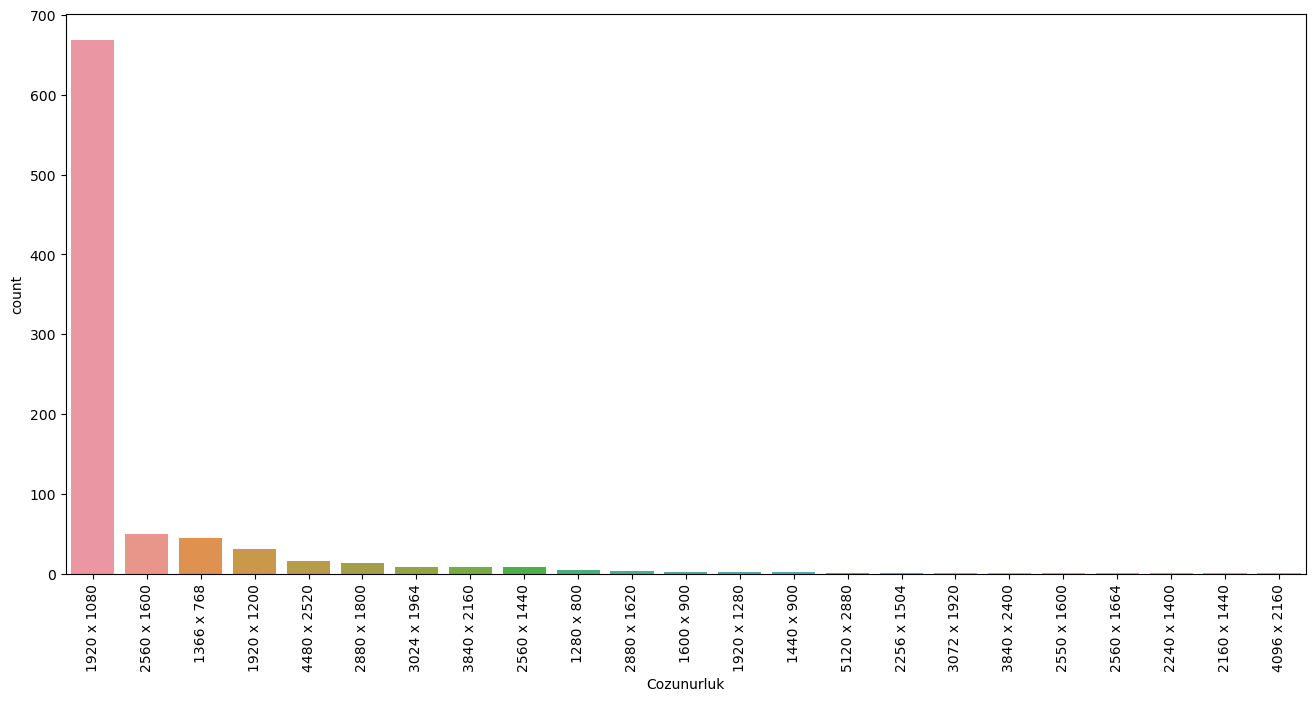

In [50]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
sns.countplot(x='Cozunurluk',data=data,order = data['Cozunurluk'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()


In [51]:
for i in range(0, 100):
    data["price"] = data["price"].str.replace(',{}'.format(i), '')

data["price"] = data["price"].str.replace(',00', '')
data["price"] = data["price"].str.replace(',01', '')
data["price"] = data["price"].str.replace(',02', '')
data["price"] = data["price"].str.replace(',03', '')
data["price"] = data["price"].str.replace(',04', '')
data["price"] = data["price"].str.replace(',05', '')
data["price"] = data["price"].str.replace(',06', '')
data["price"] = data["price"].str.replace(',07', '')
data["price"] = data["price"].str.replace(',08', '')
data["price"] = data["price"].str.replace(',09', '') 
data["price"] = data["price"].str.replace('.', '')


   

In [52]:
# En az 5 non-NaN değeri olan satırları bırakın
data.dropna(thresh=5, inplace=True)

In [53]:
data["price"] = data["price"].str.replace('TL', '')

In [54]:
data["price"] = data.price.astype(float)

In [55]:
print(data["price"])

0        10499.0
3        11999.0
5        14999.0
6        11999.0
7         6499.0
          ...   
1170    429999.0
1171      8999.0
1173     28999.0
1174     10179.0
1175     24099.0
Name: price, Length: 982, dtype: float64


In [56]:
data["Garanti_Suresi"]

0       2 Yl
3       2 Yl
5       2 Yl
6       2 Yl
7       2 Yl
        ... 
1170    2 Yl
1171    2 Yl
1173    2 Yl
1174    2 Yl
1175    2 Yl
Name: Garanti_Suresi, Length: 982, dtype: object

In [57]:
data["Ram_(Sistem Bellegi)"]

0        8 GB
3       32 GB
5        8 GB
6       16 GB
7       16 GB
        ...  
1170    32 GB
1171     8 GB
1173     8 GB
1174     8 GB
1175    32 GB
Name: Ram_(Sistem Bellegi), Length: 982, dtype: object

In [58]:
data["Ram_(Sistem Bellegi)"] = data["Ram_(Sistem Bellegi)"].str.replace('GB', '')

In [59]:
data["Ram_(Sistem Bellegi)"] = data["Ram_(Sistem Bellegi)"].astype(float)


In [60]:
data.loc[data["SSD_Kapasitesi"] == "SSD Yok" , "SSD_Kapasitesi"] = "0"

In [61]:
data.loc[data["SSD_Kapasitesi"] == "Yok" , "SSD_Kapasitesi"] = "0"

In [62]:
data["SSD_Kapasitesi"]

0       256 GB
3       256 GB
5       512 GB
6       512 GB
7       256 GB
         ...  
1170    512 GB
1171    128 GB
1173    512 GB
1174    256 GB
1175      1 TB
Name: SSD_Kapasitesi, Length: 982, dtype: object

In [63]:
print(data["SSD_Kapasitesi"].unique())

['256 GB' '512 GB' '1 TB' '0' '128 GB' '240 GB' '8 GB' '500 GB' '2 TB'
 '64 GB' '4 TB' '32 GB' '120 GB' '480 GB']


In [64]:
data["SSD_Kapasitesi"] = data["SSD_Kapasitesi"].str.replace('TB', '')

In [65]:
data["SSD_Kapasitesi"] = data["SSD_Kapasitesi"].str.replace('GB', '')

In [66]:
data["SSD_Kapasitesi"] = data["SSD_Kapasitesi"].astype(float)

In [67]:
data["Ekran_Boyutu"] = data["Ekran_Boyutu"].str.replace('in', '')


In [68]:
data["Garanti_Suresi"] = data["Garanti_Suresi"].str.replace('Yl', '')

In [69]:
#sütundaki benzersiz değerler
print(data["Ekran_Boyutu"].unique())

['15,6 ' nan '14 ' '13,3 ' '10,1 ' '24" / 61 Ekran' '14,1 ' '18 - 21 '
 '13 ' '11 ' '19" / 48 Ekran' '16,1 ' '16 ' '17,3 ' '6  ve st' '17 '
 '20" / 51 Ekran' '14,5 ' '22 - 24 ' '11,6 ' '18 ' '13,6 ' '25 + ' '7 '
 '5,5 - 6 ' '15 ' '24 ' '12,5 ' '22" / 55 Ekran' '10 ' '21,5 ' '13,4 '
 '8,0 ' 'Belirtilmemi' '4 - 4,5 ' '27 ' '14 - 17 ' '23.8 ']


In [70]:
data.loc[data["Ekran_Boyutu"] == "14 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "13,3 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "10,1 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "14,1 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "13 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "11 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "14,5 ", "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "11,6 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "13,6 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "5,5 - 6 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "12,5 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "10 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "13,4 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "8,0 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "4 - 4,5 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "6  ve st" , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "7 " , "Ekran_Boyutu"] = "kucuk ekran"
data.loc[data["Ekran_Boyutu"] == "Belirtilmemi" , "Ekran_Boyutu"] = "kucuk ekran"


In [71]:
data.loc[data["Ekran_Boyutu"] == "15,6 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "14,1 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "10,1 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "14,1 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == '19" / 48 Ekran' , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "16,1 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "16 ", "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "17,3 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "17 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "18 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "14 - 17 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "18 - 21 " , "Ekran_Boyutu"] = "orta ekran"
data.loc[data["Ekran_Boyutu"] == "15 " , "Ekran_Boyutu"] = "orta ekran"


In [72]:
data.loc[data["Ekran_Boyutu"] == '24" / 61 Ekran' , "Ekran_Boyutu"] = "buyuk ekran"
data.loc[data["Ekran_Boyutu"] == '20" / 51 Ekran' , "Ekran_Boyutu"] = "buyuk ekran"
data.loc[data["Ekran_Boyutu"] == "22 - 24 " , "Ekran_Boyutu"] = "buyuk ekran"
data.loc[data["Ekran_Boyutu"] == "25 + " , "Ekran_Boyutu"] = "buyuk ekran"
data.loc[data["Ekran_Boyutu"] == "24 " , "Ekran_Boyutu"] = "buyuk ekran"
data.loc[data["Ekran_Boyutu"] == '22" / 55 Ekran' , "Ekran_Boyutu"] = "buyuk ekran"
data.loc[data["Ekran_Boyutu"] == "21,5 ", "Ekran_Boyutu"] = "buyuk ekran"
data.loc[data["Ekran_Boyutu"] == "27 " , "Ekran_Boyutu"] = "buyuk ekran"
data.loc[data["Ekran_Boyutu"] == "23.8 " , "Ekran_Boyutu"] = "buyuk ekran"

In [73]:
data

,Ekran_Boyutu,Garanti_Suresi,Ram_(Sistem Bellegi),SSD_Kapasitesi,Isletim_Sistemi,Cozunurluk,price
0,orta ekran,2,8.0,256.0,Free Dos,1920 x 1080,10499.0
3,NaN,2,32.0,256.0,Free Dos,1920 x 1080,11999.0
5,kucuk ekran,2,8.0,512.0,Windows,1920 x 1080,14999.0
6,orta ekran,2,16.0,512.0,Free Dos,1920 x 1080,11999.0
7,NaN,2,16.0,256.0,Free Dos,NaN,6499.0
...,...,...,...,...,...,...,...
1170,orta ekran,2,32.0,512.0,Free Dos,2560 x 1600,429999.0
1171,orta ekran,2,8.0,128.0,Windows,1920 x 1080,8999.0
1173,orta ekran,2,8.0,512.0,Free Dos,1920 x 1080,28999.0
1174,orta ekran,2,8.0,256.0,Free Dos,1920 x 1080,10179.0


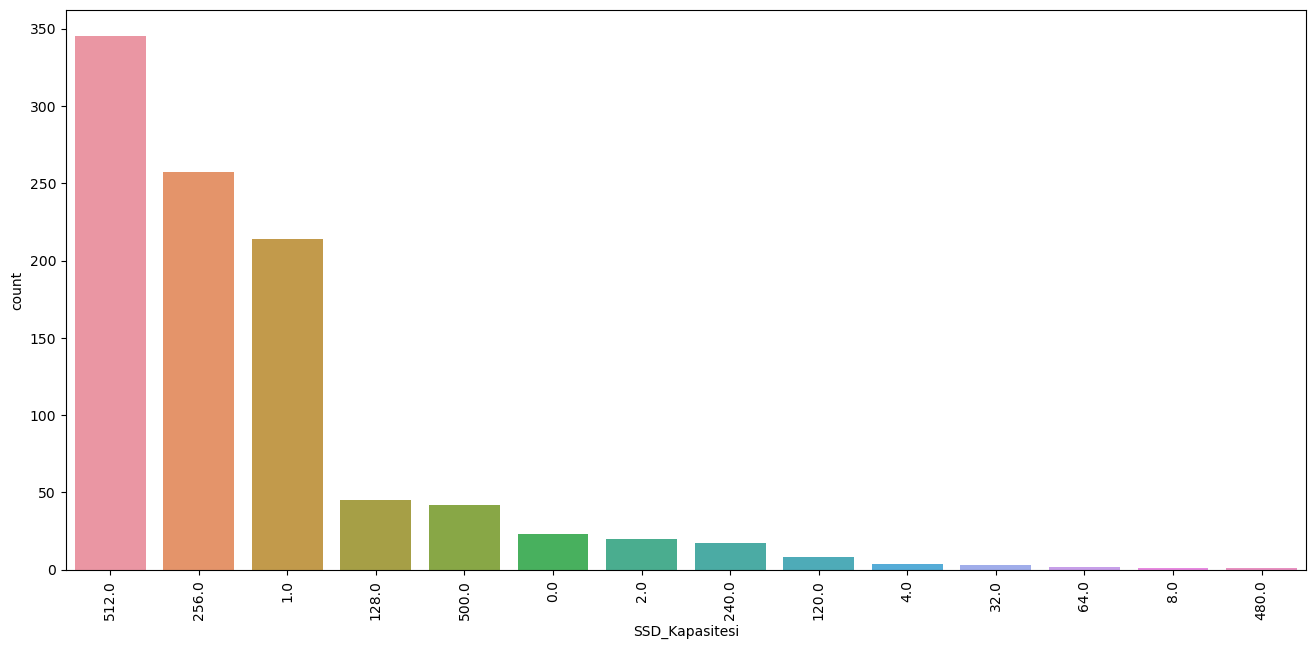

In [74]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
sns.countplot(x='SSD_Kapasitesi', data=data, order=data['SSD_Kapasitesi'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


In [75]:
data.to_excel("C:\\Users\\Gözde\\Desktop\\data\\ml_onisleme.xlsx", index=False)